In [ ]:
# To restart the kernel, go to 'Runtime' menu -> 'Restart runtime'.
!pip install spacy
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz


--2025-11-20 18:16:01--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45409631 (43M) [application/x-gzip]
Saving to: ‘reviews_Cell_Phones_and_Accessories_5.json.gz’

reviews_Cell_Phones 100%[===================>]  43.31M  12.0MB/s    in 8.3s    

2025-11-20 18:16:10 (5.24 MB/s) - ‘reviews_Cell_Phones_and_Accessories_5.json.gz’ saved [45409631/45409631]



In [ ]:
import gzip
import shutil

with gzip.open("reviews_Cell_Phones_and_Accessories_5.json.gz", "rb") as f_in:
    with open("reviews_Cell_Phones_and_Accessories_5.json", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)


In [ ]:
!pip install gensim
import gensim
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 49.5 MB/s eta 0:00:00


Stap 1 — Dataset kiezen

Ik gebruik:
Amazon Cell Phones & Accessories Reviews → kolom: reviewText

In [ ]:
df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [ ]:
df.shape

(194439, 9)

In [ ]:
df.reviewText[1000]

"I bought two of these, one for me and one for my girlfriend.  She likes going out without a purse or wallet, but would like to hold her ID and credit card on her, and she does manage to fit both cards in this case, but it is a very tight fit.I use my case to hold my ID card for work.  It is an RFID card that we use to badge in and out of the building.  I always have my phone on me and therefore, always have my work badge on me as well.  The case is very low profile and holds up pretty well.  It doesn't offer a ton of front or top/bottom protection, but if you're looking for a case to take out to the bar, or something to hold a credit card/id, this works great!"

In [ ]:
print(df.reviewText)

0         They look good and stick good! I just don't li...
1         These stickers work like the review says they ...
2         These are awesome and make my phone look so st...
3         Item arrived in great time and was in perfect ...
4         awesome! stays on, and looks great. can be use...
                                ...                        
194434    Works great just like my original one. I reall...
194435    Great product. Great packaging. High quality a...
194436    This is a great cable, just as good as the mor...
194437    I really like it becasue it works well with my...
194438    product as described, I have wasted a lot of m...
Name: reviewText, Length: 194439, dtype: object


In [ ]:
import spacy

nlp = spacy.load("en_core_web_lg")

De functie preprocess heeft als doel om een stuk tekst automatisch schoon te maken en te normaliseren voordat je het gebruikt voor NLP-taken. Eerst wordt de ingevoerde tekst omgezet naar een string en doorgegeven aan het spaCy-model (nlp). Dit model analyseert de tekst en splitst haar op in afzonderlijke “tokens”: dit kunnen woorden, leestekens, getallen of spaties zijn. De functie maakt vervolgens een lege lijst aan waarin alleen de tokens zullen worden opgeslagen die bruikbaar zijn voor verdere verwerking.

Daarna doorloopt de functie elk token één voor één. Voor elk token voert de functie een reeks controles uit om te bepalen of het nuttig is om te behouden. Als een token een stopwoord is (bijvoorbeeld “this”, “is”, “you”, “would”), wordt het overgeslagen omdat stopwoorden nauwelijks betekenis toevoegen in klassieke NLP-modellen. Hetzelfde gebeurt wanneer het token een leesteken is (zoals “.”, “?”, “!”), een getal voorstelt of simpelweg een spatie is. Al deze elementen worden beschouwd als “ruis” en daarom genegeerd.

Als een token door al deze filters heen komt, wordt het wel bewaard. Voordat het token wordt toegevoegd, wordt het eerst omgezet naar zijn lemma: de basisvorm van het woord. Door lemmatization verandert bijvoorbeeld “running” in “run”, “ideas” in “idea” en “done” in “do”. Daarna wordt het token omgezet naar kleine letters zodat de woorden consistent zijn en niet dubbel geteld worden als varianten met hoofdletters.

Ten slotte worden alle overgebleven tokens samengevoegd tot één string waarbij de woorden worden gescheiden door spaties. Het resultaat is een sterk opgeschoonde versie van de oorspronkelijke tekst, die alleen betekenisvolle woorden bevat in hun basisvorm. Dit maakt de tekst zeer geschikt voor verdere analyse, clustering, vectorisatie of machine-learning modellen.


tap 2 — Preprocessen van de tekst

lowercase

stopwords verwijderen

punctuation verwijderen

tokenizen


In [ ]:
def preprocess(text):
    doc = nlp(str(text))

    cleaned = []
    for token in doc:
        if token.is_stop or token.is_punct or token.like_num or token.is_space:
            continue
        cleaned.append(token.lemma_.lower())

    return " ".join(cleaned)


In [ ]:
a = df.reviewText[0]
a


"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [ ]:
preprocess(a)

'look good stick good like rounded shape bump siri keep pop irritate will buy product like'

In [ ]:
df["clean_text"] = df["reviewText"].map(preprocess)


In [ ]:
reviews = df["reviewText"].head(1000).copy()



In [ ]:
reviews = df["reviewText"].sample(1000, random_state=42).copy()


In [ ]:
print(reviews)

0      They look good and stick good! I just don't li...
1      These stickers work like the review says they ...
2      These are awesome and make my phone look so st...
3      Item arrived in great time and was in perfect ...
4      awesome! stays on, and looks great. can be use...
                             ...                        
995    Nice looking case.  Very inexpensive and seems...
996    This is a good, inexpensive case. I use a case...
997    I searched online for a case for my new Samsun...
998    I always buy BoxWave cases for my phones, beca...
999    Great design and protected my phone really wel...
Name: reviewText, Length: 1000, dtype: object


In [ ]:
clean = reviews.map(preprocess)


In [ ]:
clean

,reviewText
0,look good stick good like rounded shape bump s...
1,sticker work like review say stick great stay ...
2,awesome phone look stylish far year believe ye...
3,item arrive great time perfect condition order...
4,awesome stay look great multiple apple product...
...,...
995,nice look case inexpensive fit excellent value...
996,good inexpensive case use case phone slippery ...
997,search online case new samsung galaxy note ii ...
998,buy boxwave case phone practical comfortable g...


Stap 3A: TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Maak een TF-IDF vectorizer die maximaal 5000 unieke woorden gebruikt
tfidf = TfidfVectorizer(max_features=5000)

# Pas de vectorizer toe op de opgeschoonde tekst (clean)
# fit_transform():
#   - fit: leert welke woorden voorkomen en bouwt het vocabulaire
#   - transform: zet elke review om in een TF-IDF vector
X_tfidf = tfidf.fit_transform(clean)



In [ ]:
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32742 stored elements and shape (1000, 5000)>
  Coords	Values
  (0, 2566)	0.153478687568906
  (0, 1863)	0.24099372568756605
  (0, 4231)	0.2421613719394535
  (0, 2512)	0.2487814727875958
  (0, 3776)	0.36313296388642374
  (0, 3937)	0.2738725666724523
  (0, 547)	0.31795303060902264
  (0, 4019)	0.3358945290016862
  (0, 2386)	0.23063184251372582
  (0, 3332)	0.29385211086427404
  (0, 2313)	0.38475332596578693
  (0, 4931)	0.222412162334103
  (0, 561)	0.12378821728416185
  (0, 3428)	0.15708292230870816
  (1, 4231)	0.28849310895996133
  (1, 2512)	0.14818990320652026
  (1, 4232)	0.4001598445625202
  (1, 4956)	0.11930309630452525
  (1, 3725)	0.23072597623783495
  (1, 3829)	0.22729139256524805
  (1, 1888)	0.1407078155077479
  (1, 4220)	0.2591864437956956
  (1, 3245)	0.11602945602644206
  (1, 4326)	0.3153548044853874
  (1, 4285)	0.3347539672833608
  :	:
  (998, 1661)	0.1477896501074961
  (998, 4663)	0.18939435310141
  (998, 3368)	0.20194

Word2Vec (met Gensim)

In [ ]:
!pip install gensim


In [ ]:
from gensim.models import Word2Vec

# Tokenize per document:
# Elke review (string) wordt opgesplitst in een lijst van woorden.
# Voorbeeld: "good product work well" -> ["good", "product", "work", "well"]
tokenized = clean.apply(lambda x: x.split())

# Train het Word2Vec-model:
# - sentences: lijst van lijsten met tokens
# - vector_size: lengte van de woordvector (100-dimensionaal)
# - window: aantal woorden links/rechts dat het model meeneemt (context)
# - min_count: woorden die minder dan 2 keer voorkomen worden genegeerd
# - workers: aantal CPU-cores voor sneller trainen
w2v_model = Word2Vec(
    sentences=tokenized,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

# Functie om van één document één vector te maken:
# Voor elk woord in het document wordt de woordvector opgehaald.
# Daarna wordt het gemiddelde genomen, zodat één vaste documentvector ontstaat.
# Als een document geen bekende woorden bevat -> geef een nulvector terug.
import numpy as np

def doc_vector(words):
    # Verzamel vectoren van woorden die in het Word2Vec-vocabulaire zitten
    word_vecs = [w2v_model.wv[w] for w in words if w in w2v_model.wv]

    # Geen geldige woorden? -> return een vector van nullen
    if len(word_vecs) == 0:
        return np.zeros(100)

    # Neem het gemiddelde van alle woordvectoren
    return np.mean(word_vecs, axis=0)

# Pas de doc_vector functie toe op alle tokenized documenten
# np.vstack zet alle documentvectoren onder elkaar in één matrix (num_documents x 100)
X_w2v = np.vstack(tokenized.apply(doc_vector))



In [ ]:
print(X_w2v)

[[-0.19850016  0.46986055 -0.00419934 ... -0.4759008   0.04673876
  -0.02371963]
 [-0.1916015   0.45186046 -0.00600712 ... -0.45470905  0.04370828
  -0.01980032]
 [-0.21896589  0.53304052 -0.0066099  ... -0.54023588  0.05668952
  -0.02778466]
 ...
 [-0.16401467  0.39519161 -0.00337793 ... -0.40340123  0.04441767
  -0.0210189 ]
 [-0.17546773  0.42269138 -0.00729378 ... -0.43224692  0.04621565
  -0.02121906]
 [-0.2424856   0.57912266 -0.00685831 ... -0.58620131  0.05895404
  -0.02699411]]


In [ ]:
X_w2v.shape

(1000, 100)

STAP 4 Clustering: K-Means

We nemen je TF-IDF matrix (X_tfidf) en clusteren de documenten.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# aantal clusters kiezen
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

df_small["cluster"] = clusters

print("Silhouette Score:", silhouette_score(X_tfidf, clusters))


Silhouette Score: 0.011967328181329822


PCA = Principle Component Analysis

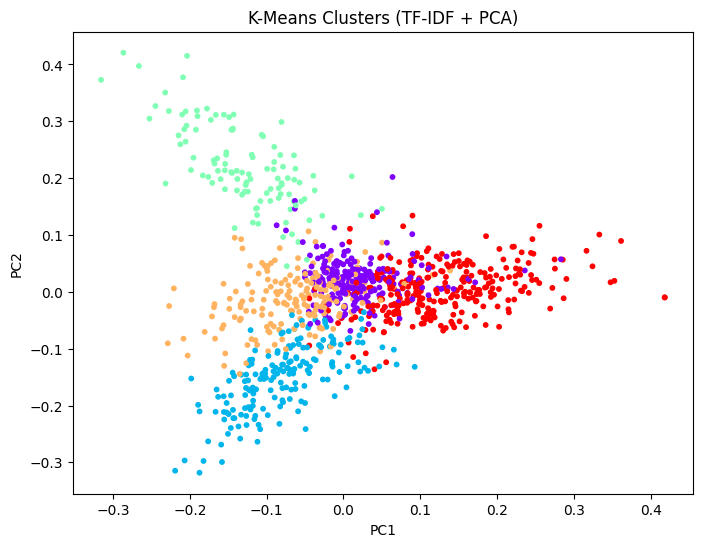

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduceer TF-IDF naar 2 componenten om te plotten
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='rainbow', s=10)
plt.title("K-Means Clusters (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In deze stap hebben we de reviews eerst met TF-IDF omgezet naar numerieke vectoren. Elke review wordt dan voorgesteld als een grote lijst met woordgewichten, zodat we er wiskundige algoritmes op kunnen toepassen.

Daarna hebben we K-Means clustering gebruikt. Dat algoritme probeert documenten die op elkaar lijken in dezelfde groep te plaatsen. We hebben gekozen voor vijf clusters en we hebben het model laten bepalen in welke cluster elke review hoort.

Na het clusteren hebben we de Silhouette Score berekend. Die score geeft aan hoe goed de clusters gescheiden zijn. De waarde ligt altijd tussen –1 en 1. Hoge waarden betekenen duidelijke clusters, waarden rond nul betekenen dat de clusters overlappen. Onze Silhouette Score was ongeveer 0.012. Dat ligt heel dicht bij nul, en dat betekent dat de clusters in deze dataset nauwelijks van elkaar te onderscheiden zijn.

Daarna hebben we een PCA-visualisatie gemaakt. PCA is een techniek die de duizenden TF-IDF kenmerken reduceert naar slechts twee dimensies, zodat we de data kunnen plotten. In de scatterplot zien we dat de kleuren van de clusters sterk door elkaar heen lopen. De punten liggen dicht bij elkaar en vormen geen duidelijke gescheiden groepen. Dat bevestigt wat de Silhouette Score al aangaf: dit is een dataset zonder sterke, natuurlijke clusterstructuur.

De oorzaak ligt vooral in de inhoud van de data. Alle reviews komen uit één categorie, namelijk accessoires voor mobiele telefoons. Daardoor bevatten de teksten veel dezelfde woorden en dezelfde soort uitspraken, waardoor ze in TF-IDF-ruimte sterk op elkaar lijken. Voor dit type dataset werkt clustering dus minder goed, omdat er weinig thema-variatie is.

STAP 5 — Evaluatie van het model (Clustering)

Voor clustering zijn er twee evaluatiemogelijkheden volgens de opdracht:

Visualisaties

Silhouette Score

⭐ STAP 5 – Evaluatie van het model (Clustering)
1. Silhouette Score

De Silhouette Score van het K-Means model (k = 5) op de TF-IDF vectoren was:

0.0119


Een score dicht bij 0 betekent dat:

de clusters sterk overlappen

er nauwelijks scheiding is tussen groepen

de dataset weinig natuurlijke clusterstructuur bevat

K-Means moeite heeft om duidelijke patronen te vinden

Dit resultaat is logisch, omdat alle 1000 reviews uit dezelfde productcategorie komen en daardoor sterk op elkaar lijken in taalgebruik.

2. Visualisatie (PCA-plot)

De PCA-visualisatie laat de clusters zien in 2 dimensies.
Hierbij worden de 5000-dimensionale TF-IDF vectoren teruggebracht naar twee principal components.

Observaties uit de plot:

De vijf clusterkleuren liggen sterk door elkaar heen

Er zijn geen duidelijke grenzen tussen clusters

Reviews vormen één grote, deels overlappende wolk

Dit ondersteunt de lage Silhouette Score

⭐ STAP 6 – Uitleg van de resultaten

In deze analyse zijn de tekstreviews eerst opgeschoond met spaCy en vervolgens omgezet naar TF-IDF vectoren. Daarna is K-Means clustering toegepast om te onderzoeken of de reviews automatisch konden worden gegroepeerd op basis van vergelijkbare inhoud.

De kwaliteit van deze clusters is beoordeeld met de Silhouette Score. Deze score was 0.012, wat zeer laag is en aangeeft dat de gevonden clusters nauwelijks van elkaar verschillen. De reviews in deze dataset zijn inhoudelijk sterk homogeen: ze komen allemaal uit dezelfde categorie en gebruiken vaak vergelijkbare woorden. Hierdoor liggen de TF-IDF representaties dicht bij elkaar en ontstaat er geen duidelijke clusterstructuur.

De PCA-visualisatie bevestigt dit. In de 2D-projectie van de data overlappen de clusters bijna volledig en is er geen duidelijke scheiding zichtbaar. Dit toont aan dat K-Means in deze setup geen betekenisvolle groepen kon vormen.

Conclusie:
Hoewel clustering een bruikbare techniek is om structuur te ontdekken in ongesuperviseerde tekstdata, laat deze analyse zien dat het minder effectief is voor datasets die inhoudelijk weinig variatie hebben. In dit geval leveren TF-IDF en K-Means geen sterke, interpreteerbare clusters op.

⭐ Wat is de Silhouette Score?

De Silhouette Score is een maatstaf om te beoordelen hoe goed een clustering is.
De score ligt altijd tussen –1 en 1:

Score	Betekenis
+1	Clusters zijn perfect gescheiden
~0.5 – 1.0	Duidelijke clusters
~0.2 – 0.5	Redelijke clusters, maar met overlap
0	Geen scheiding; punten horen bij geen enkele cluster
< 0	Slechte clustering; punten zitten waarschijnlijk in de verkeerde cluster

Interpretatie:
Een hoge Silhouette Score betekent dat punten dicht bij hun eigen clustercentrum liggen en ver van andere clusters.
Een score rond 0 betekent dat de clusters overlappen en niet duidelijk gescheiden zijn.

⭐ Wat is PCA (Principal Component Analysis)?

PCA (Principal Component Analysis) is een techniek voor dimensionality reduction.
Het wordt gebruikt om grote vectoren (bijv. TF-IDF met duizenden dimensies) terug te brengen naar een kleiner aantal dimensies, zoals 2 of 3, zodat we ze kunnen visualiseren of gemakkelijker analyseren.

Wat PCA doet:

Het zoekt de richtingen waarin de data het meest varieert (principal components)

Vervolgens projecteert het de data op die nieuwe assen

Hierdoor kun je een dataset met duizenden dimensies in 2D of 3D plotten

Waarom gebruiken we PCA bij clustering?

TF-IDF heeft heel veel dimensies (bijv. 5000)

Je kunt die ruimte niet visualiseren

PCA reduceert alles naar 2 dimensies

Daardoor kun je clusters tekenen in een scatterplot

Zo zie je meteen of clusters overlappen of gescheiden zijn